In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dubai=pd.read_csv("dubai_properties.csv")
dubai

,Address,Rent,Beds,Baths,Type,Area_in_sqft,Rent_per_sqft,Rent_category,Frequency,Furnishing,Purpose,Posted_date,Age_of_listing_in_days,Location,City,Latitude,Longitude
0,"The Gate Tower 2, The Gate Tower, Shams Gate D...",124000,3,4,Apartment,1785,69.467787,Medium,Yearly,Unfurnished,For Rent,07/03/2024,45,Al Reem Island,Abu Dhabi,24.493598,54.407841
1,"Water's Edge, Yas Island, Abu Dhabi",140000,3,4,Apartment,1422,98.452883,Medium,Yearly,Unfurnished,For Rent,08/03/2024,44,Yas Island,Abu Dhabi,24.494022,54.607372
2,"Al Raha Lofts, Al Raha Beach, Abu Dhabi",99000,2,3,Apartment,1314,75.342466,Medium,Yearly,Furnished,For Rent,21/03/2024,31,Al Raha Beach,Abu Dhabi,24.485931,54.600939
3,"Marina Heights, Marina Square, Al Reem Island,...",220000,3,4,Penthouse,3843,57.246942,High,Yearly,Unfurnished,For Rent,24/02/2024,57,Al Reem Island,Abu Dhabi,24.493598,54.407841
4,"West Yas, Yas Island, Abu Dhabi",350000,5,7,Villa,6860,51.020408,High,Yearly,Unfurnished,For Rent,16/02/2024,65,Yas Island,Abu Dhabi,24.494022,54.607372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73737,"Al Huboob 1, Al Salamah, Umm Al Quwain",14000,0,1,Apartment,419,33.412888,Low,Yearly,Unfurnished,For Rent,14/12/2023,129,Al Salamah,Umm Al Quwain,25.493412,55.575994
73738,"Umm Al Quwain Marina, Umm Al Quwain",14000,0,1,Apartment,500,28.000000,Low,Yearly,Unfurnished,For Rent,14/12/2023,129,Umm Al Quwain Marina,Umm Al Quwain,25.527959,55.606527
73739,"King Faisal Street, Umm Al Quwain",50000,3,4,Apartment,2000,25.000000,Low,Yearly,Unfurnished,For Rent,02/01/2024,110,King Faisal Street,Umm Al Quwain,NaN,NaN
73740,"Al Maqtaa, Umm Al Quwain",37000,1,2,Apartment,989,37.411527,Low,Yearly,Unfurnished,For Rent,23/10/2023,181,Al Maqtaa,Umm Al Quwain,NaN,NaN


In [2]:
dubai.nunique()

Address                    4515
Rent                       2099
Beds                         13
Baths                        11
Type                          9
Area_in_sqft               4964
Rent_per_sqft             31328
Rent_category                 3
Frequency                     1
Furnishing                    2
Purpose                       1
Posted_date                 544
Age_of_listing_in_days      544
Location                    441
City                          8
Latitude                    412
Longitude                   412
dtype: int64

# exploratory analysis

In [3]:
dubai.shape

(73742, 17)

In [4]:
# lets extract the data type of each column
dubai.dtypes

Address                    object
Rent                        int64
Beds                        int64
Baths                       int64
Type                       object
Area_in_sqft                int64
Rent_per_sqft             float64
Rent_category              object
Frequency                  object
Furnishing                 object
Purpose                    object
Posted_date                object
Age_of_listing_in_days      int64
Location                   object
City                       object
Latitude                  float64
Longitude                 float64
dtype: object

In [5]:
# lets extract the total number of null values

dubai.isna().sum()

Address                     0
Rent                        0
Beds                        0
Baths                       0
Type                        0
Area_in_sqft                0
Rent_per_sqft               0
Rent_category               0
Frequency                   0
Furnishing                  0
Purpose                     0
Posted_date                 0
Age_of_listing_in_days      0
Location                    0
City                        0
Latitude                  719
Longitude                 719
dtype: int64

In [6]:
# replace null values with 0

dubai[["Latitude","Longitude"]]=dubai[["Latitude","Longitude"]].fillna(0)

In [7]:
dubai.isna().sum()

Address                   0
Rent                      0
Beds                      0
Baths                     0
Type                      0
Area_in_sqft              0
Rent_per_sqft             0
Rent_category             0
Frequency                 0
Furnishing                0
Purpose                   0
Posted_date               0
Age_of_listing_in_days    0
Location                  0
City                      0
Latitude                  0
Longitude                 0
dtype: int64

In [8]:
# removing irrelevant columns
dubai.drop(["Longitude","Latitude","Rent_per_sqft","Area_in_sqft","Posted_date","Purpose"],axis=1,inplace=True)

In [9]:
dubai.columns

Index(['Address', 'Rent', 'Beds', 'Baths', 'Type', 'Rent_category',
       'Frequency', 'Furnishing', 'Age_of_listing_in_days', 'Location',
       'City'],
      dtype='object')

In [10]:
dubai.nunique()

Address                   4515
Rent                      2099
Beds                        13
Baths                       11
Type                         9
Rent_category                3
Frequency                    1
Furnishing                   2
Age_of_listing_in_days     544
Location                   441
City                         8
dtype: int64

# Housing analysis breakdowns

In [25]:
# average rent of properties by the property type

average_rent_by_type = dubai.groupby('Type')['Rent'].mean()
average_rent_by_type

Type
Apartment               1.096384e+05
Hotel Apartment         2.257042e+05
Penthouse               4.811372e+05
Residential Building    2.866282e+06
Residential Floor       1.409327e+06
Residential Plot        2.996498e+05
Townhouse               1.914537e+05
Villa                   2.838021e+05
Villa Compound          1.786589e+05
Name: Rent, dtype: float64

In [12]:
# identifying the datatype of the above calculated field

average_rent_by_type.dtypes

dtype('float64')

In [13]:
# changing the data type from float to integer

average_rent_by_type=average_rent_by_type.astype("int")

In [14]:
# sorting the average rents in ascending order to get the property type with the highest average rent

average_rent_by_type.sort_values(ascending=True,inplace=True)
average_rent_by_type

Type
Apartment                109638
Villa Compound           178658
Townhouse                191453
Hotel Apartment          225704
Villa                    283802
Residential Plot         299649
Penthouse                481137
Residential Floor       1409327
Residential Building    2866281
Name: Rent, dtype: int32

<Axes: title={'center': 'Average rents by property type'}, xlabel='Type'>

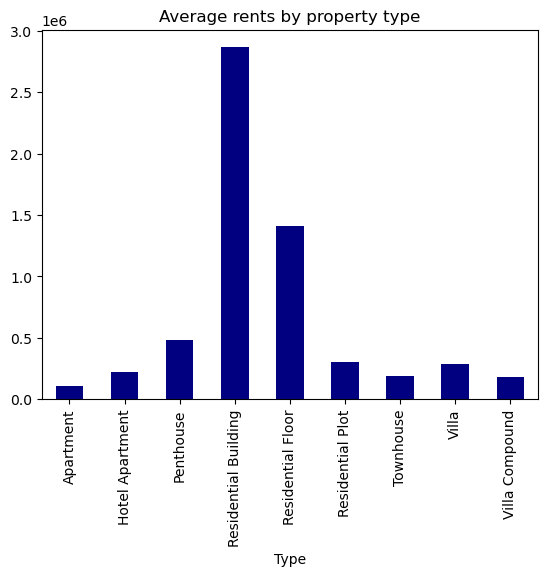

In [15]:
# a chart to show the average rent distribution
dubai.groupby('Type')['Rent'].mean().plot(kind='bar',title='Average rents by property type',x='Type',color="navy")

In [16]:
# total rent received of properties by the property type

total_rent_by_type=dubai.groupby('Type')['Rent'].sum()
total_rent_by_type

Type
Apartment               6198297348
Hotel Apartment          104952455
Penthouse                129907047
Residential Building     126116399
Residential Floor         16911925
Residential Plot           1797899
Townhouse                654963113
Villa                   3656222787
Villa Compound            19116500
Name: Rent, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Apartment'),
  Text(1, 0, 'Hotel Apartment'),
  Text(2, 0, 'Penthouse'),
  Text(3, 0, 'Residential Building'),
  Text(4, 0, 'Residential Floor'),
  Text(5, 0, 'Residential Plot'),
  Text(6, 0, 'Townhouse'),
  Text(7, 0, 'Villa'),
  Text(8, 0, 'Villa Compound')])

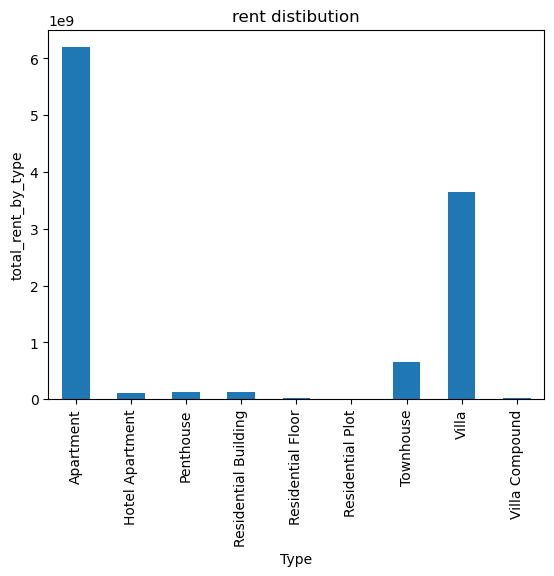

In [17]:
# a chart to show rent received distributed over the propety types

total_rent_by_type=dubai.groupby('Type')['Rent'].sum()

total_rent_by_type.plot(kind="bar")
plt.title('rent distibution')
plt.xlabel('Type')
plt.ylabel('total_rent_by_type')
plt.xticks(rotation=90)
# dubai.groupby('Type')['Rent'].sum().plot(kind='bar',title='total rents by property type',x='Type',color="purple")

In [18]:
# average listing days each property type had
average_listing_in_days = dubai.groupby('Type')['Age_of_listing_in_days'].mean()
average_listing_in_days

Type
Apartment                74.205947
Hotel Apartment          77.249462
Penthouse                80.055556
Residential Building     76.909091
Residential Floor       102.000000
Residential Plot         50.666667
Townhouse                66.850628
Villa                    76.088333
Villa Compound           90.149533
Name: Age_of_listing_in_days, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Apartment'),
  Text(1, 0, 'Hotel Apartment'),
  Text(2, 0, 'Penthouse'),
  Text(3, 0, 'Residential Building'),
  Text(4, 0, 'Residential Floor'),
  Text(5, 0, 'Residential Plot'),
  Text(6, 0, 'Townhouse'),
  Text(7, 0, 'Villa'),
  Text(8, 0, 'Villa Compound')])

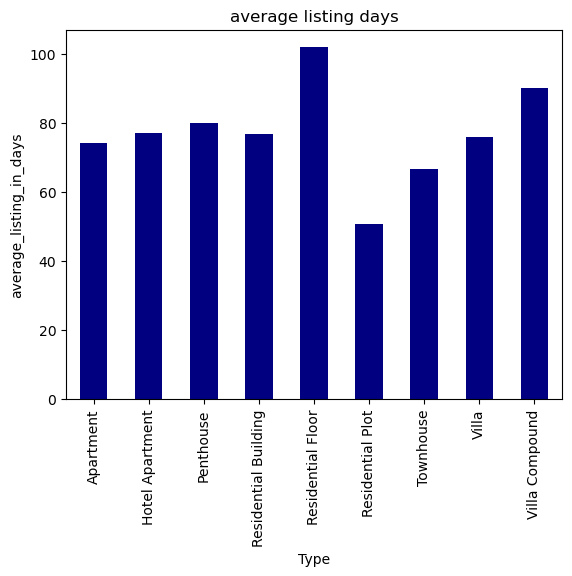

In [19]:
# chart to show average listing days per property type

average_listing_in_days = dubai.groupby('Type')['Age_of_listing_in_days'].mean()

average_listing_in_days.plot(kind="bar",color="navy")
plt.title('average listing days')
plt.xlabel('Type')
plt.ylabel('average_listing_in_days')
plt.xticks(rotation=90)

In [20]:
# total rent received by locations

total_rent_by_location=dubai.groupby('Location')['Rent'].sum()


In [21]:
# sorting in ascending order to get the location with highest and lowest rents
total_rent_by_location.sort_values(ascending=True)

Location
Al Raudah                   12000
Al Hawiyah                  15000
Al Humaid City              16000
Al Bataeh                   16000
Emirates Lake Towers        22000
                          ...    
Dubai Creek Harbour     330578296
Al Reem Island          365988021
Dubai Marina            520817556
Downtown Dubai          793289046
Palm Jumeirah           881671517
Name: Rent, Length: 441, dtype: int64

In [22]:
# getting the top 5 locations by the rents received
top_locations = dubai.groupby('Location')['Rent'].sum().nlargest(5)
top_locations

Location
Palm Jumeirah          881671517
Downtown Dubai         793289046
Dubai Marina           520817556
Al Reem Island         365988021
Dubai Creek Harbour    330578296
Name: Rent, dtype: int64

In [23]:
# total rents received by city
total_rent_by_city=dubai.groupby('City')['Rent'].sum(numeric_only=True)

In [24]:
# tsorting to know the city with highest and lowest
total_rent_by_city.sort_values(ascending=True,inplace=True)
total_rent_by_city

City
Fujairah             1986999
Umm Al Quwain        2940000
Ras Al Khaimah      63272050
Al Ain              67225998
Ajman              321035088
Sharjah            455656998
Abu Dhabi         2688370461
Dubai             7307797879
Name: Rent, dtype: int64